In [4]:
import json
from collections import defaultdict

from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt
import os

from scipy.special import kl_div
from scipy.stats import gaussian_kde, multivariate_normal, entropy
import numpy as np

In [ ]:
source_folder = "09.Figures"

In [6]:
files = ['pms_Glial progenitors_50.html', 'pms_Inflammatory_50.html', 'pms_Interferon associated_50.html', 'pms_Larger Category_50.html', 'pms_negative_50.html', 'pms_NSCs_50.html', 'pms_Senescence_50.html', 'pms_Senescence Inflammatory_50.html', 'pms_Interferon_50.html', 'healthy_Glial progenitors_50.html', 'healthy_Inflammatory_50.html', 'healthy_Interferon associated_50.html', 'healthy_Larger Category_50.html', 'healthy_negative_50.html', 'healthy_NSCs_50.html', 'healthy_Senescence_50.html', 'healthy_Senescence Inflammatory_50.html', 'healthy_Interferon_50.html']

n_edges = '50'
# files = [os.path.join(source_folder, f) for f in files]

In [7]:
data = defaultdict(dict)
for fname in files:    
    with open(os.path.join(source_folder, fname), 'r') as f:
        html = f.read()
    soup = BeautifulSoup(html)
    script = soup.find_all('script')[3]
    temp_data = json.loads(script.contents[0])
    sample = '_'.join(fname.split('_')[:-1])
    condition = sample.split('_')[0]
    subset = '_'.join(sample.split('_')[1:])
    data[condition][subset] = temp_data['x']['edges']['value']

negative 0.004895182756680126 0.05442787130262098 0.05748426905024141
Interferon 0.06910463884985785 0.09638132182212752 0.1109612925793837
Senescence Inflammatory 0.0022891822374724174 0.0710001277834432 0.07069405251247737
Larger Category 0.033262958379340034 0.14610486169509207 0.1356470754075514


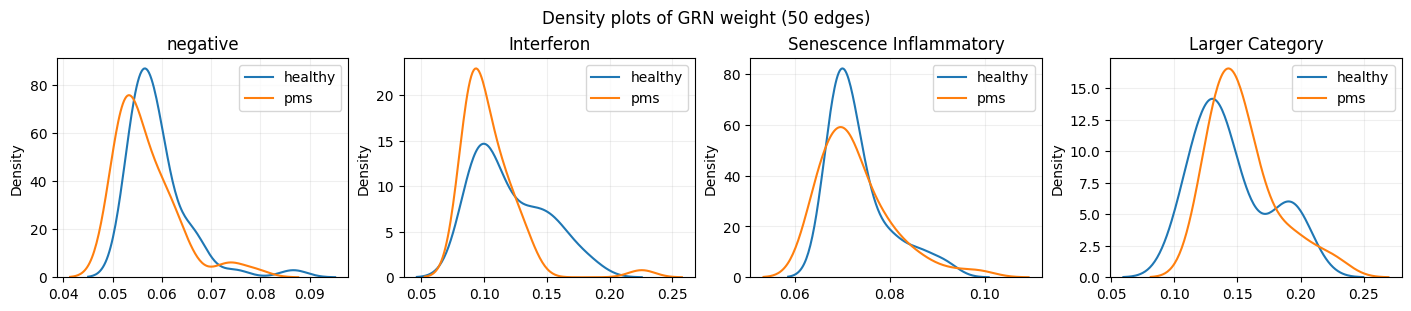

In [10]:
target_groups = ['negative',  'Interferon', 'Senescence Inflammatory', 'Larger Category']
fig, axes = plt.subplots(ncols=len(target_groups), figsize=(3.5 * len(target_groups), 3), constrained_layout=True, sharey=False, sharex=False)
for i, subset in enumerate(target_groups):
    ax = axes[i]
    sns.kdeplot(data['healthy'][subset], label='healthy', ax=ax)
    sns.kdeplot(data['pms'][subset], label='pms', ax=ax)

    print(subset, np.sum(kl_div(
        np.histogram(data['pms'][subset] / np.sum(data['pms'][subset]), bins=100)[-1],
        np.histogram(data['healthy'][subset] / np.sum(data['healthy'][subset]), bins=100)[-1]
    )), np.median(data['pms'][subset]), np.median(data['healthy'][subset]))

    ax.legend()
    ax.set_title(subset)
    ax.grid(alpha=0.2)
plt.suptitle('Density plots of GRN weight ({} edges)'.format(n_edges))
plt.savefig(os.path.join(source_folder, '6_density_plots.pdf'))
plt.show()


In [ ]:

source_folder = "09.Figures_all_samples"

In [12]:
sample_groups = ["pms cm", "senolytic cm"]
gene_names = ["Larger Category"]
n_edges = '50'

files = []
for sg in sample_groups:
    for gn in gene_names:
        files.append(f"{sg}_{gn}_{n_edges}.html")

In [13]:
data = defaultdict(dict)
for fname in files:    
    with open(os.path.join(source_folder, fname), 'r') as f:
        html = f.read()
    soup = BeautifulSoup(html)
    script = soup.find_all('script')[3]
    temp_data = json.loads(script.contents[0])
    sample = '_'.join(fname.split('_')[:-1])
    condition = sample.split('_')[0]
    subset = '_'.join(sample.split('_')[1:])
    print(condition)
    print(subset)
    data[condition][subset] = temp_data['x']['edges']['value']

pms cm
Larger Category
senolytic cm
Larger Category


Larger Category ['pms cm'] 0.018738719660528997 0.1693556747337096 0.1538378438661938


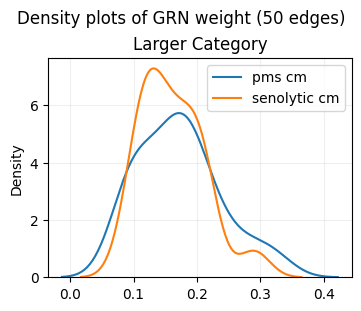

In [16]:
fig, axes = plt.subplots(ncols=len(gene_names), figsize=(3.5 * len(gene_names), 3), constrained_layout=True, sharey=False, sharex=False)
for i, subset in enumerate(gene_names):
    if len(gene_names) == 1:
        ax = axes
    else:
        ax = axes[i]
    for j in sample_groups:
        sns.kdeplot(data[j][subset], label=j, ax=ax)

    print(subset, sample_groups[0:1], np.sum(kl_div(
        np.histogram(data[sample_groups[0]][subset] / np.sum(data[sample_groups[0]][subset]), bins=100)[-1],
        np.histogram(data[sample_groups[1]][subset] / np.sum(data[sample_groups[1]][subset]), bins=100)[-1]
    )), np.median(data[sample_groups[0]][subset]), np.median(data[sample_groups[1]][subset]))
    ax.legend()
    ax.set_title(subset)
    ax.grid(alpha=0.2)

plt.suptitle('Density plots of GRN weight ({} edges)'.format(n_edges))
plt.savefig(os.path.join(source_folder, '4_density_plots_ctrl_cm_vs_.pdf'))
plt.show()